In [ ]:
#%pip install matplotlib numpy pillow

In [44]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

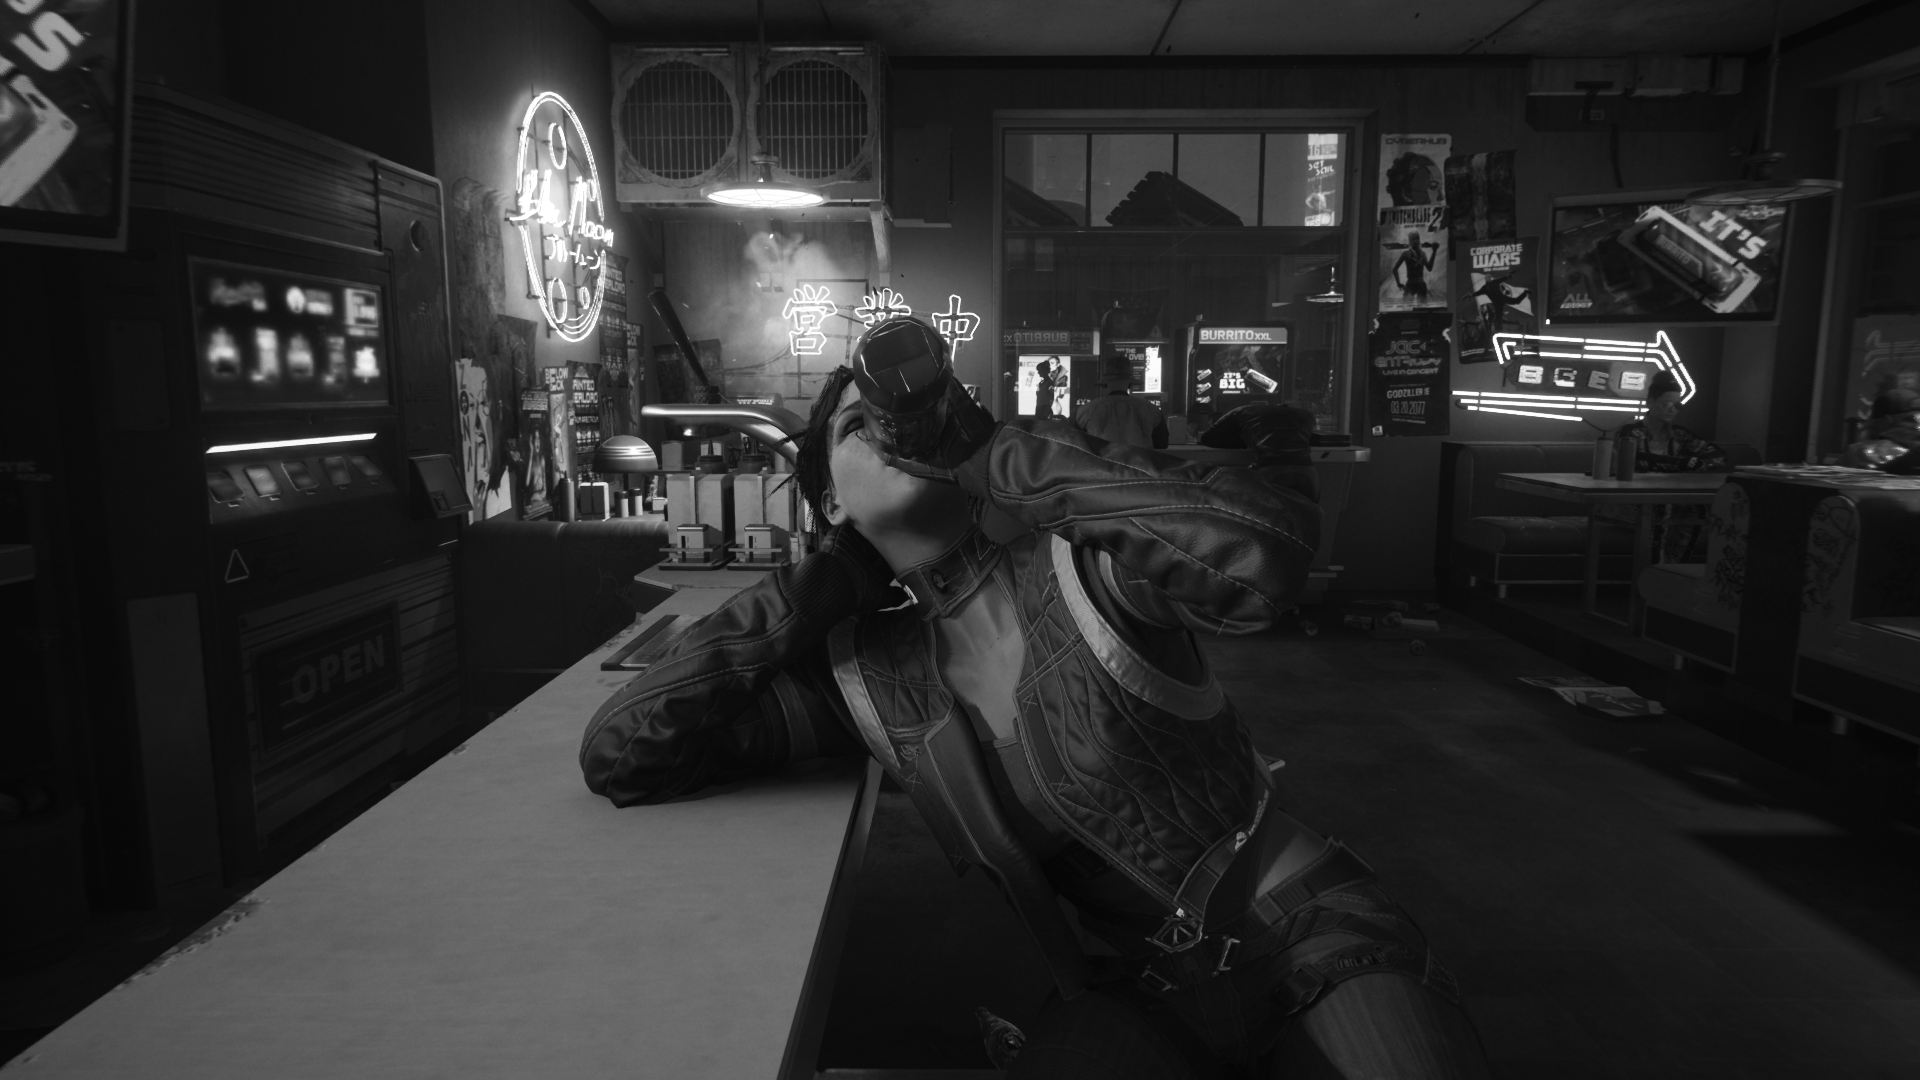

In [14]:
im = Image.open('panam.png', 'r')
# convert to grayscale
im = im.convert('L')
im

In [15]:
# convertendo pra array do numpy
im_array = np.array(im)
im_array.shape

(1080, 1920)

In [20]:
U, S, Vh = np.linalg.svd(im_array, full_matrices=True)
S = np.diag(S)
U.shape, S.shape, Vh.shape

((1080, 1080), (1080, 1080), (1920, 1920))

In [25]:
def approx_for_r(r):
    return U[:, :r] @ S[:r, :r] @ Vh[:r, :]

In [33]:
r_to_test = [1, 5, 10, 50, 100]
labels = ['Original']
labels += [f'r = {r}' for r in r_to_test]
results = [im_array]
for r in r_to_test:
    results.append(approx_for_r(r))

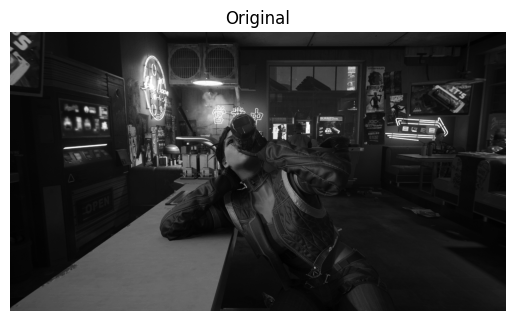

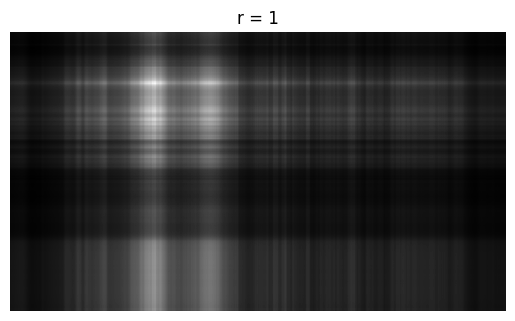

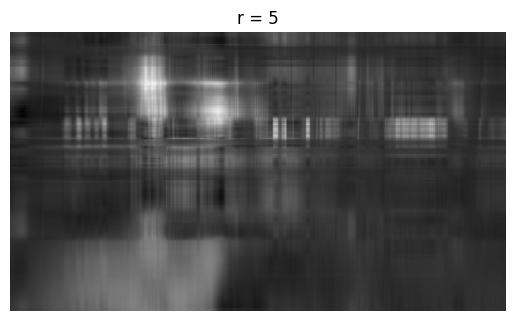

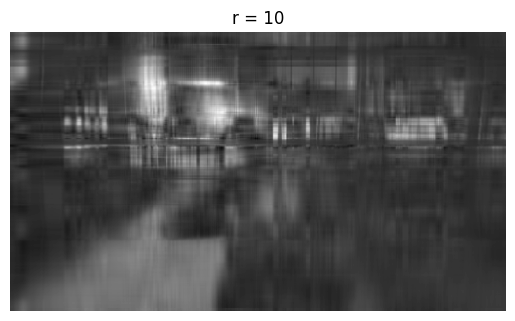

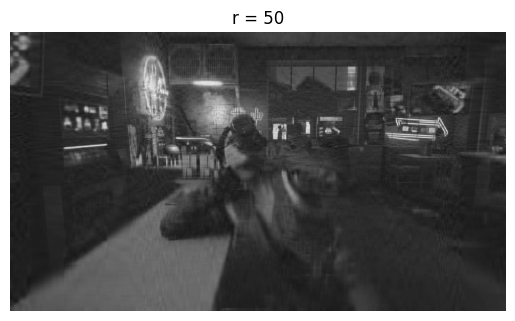

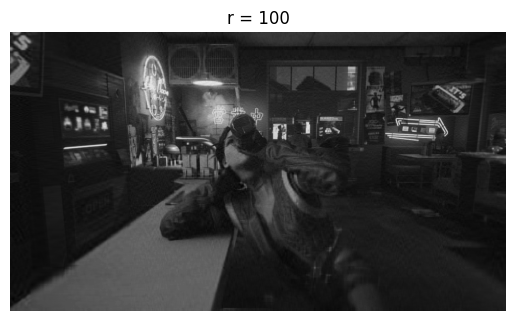

In [47]:
for res, label in zip(results, labels):
    plt.imshow(res, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()
    # save to img_compressao_out
    im_to_save = Image.fromarray(res)
    # write label to corner of image
    draw = ImageDraw.Draw(im_to_save)
    draw.text((0, 0), label, fill='white')
    im_to_save = im_to_save.convert('L')
    im_to_save.save(f'img_compressao_out/{label}.png')

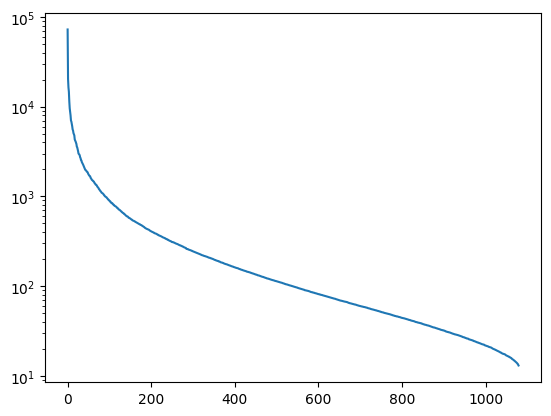

In [49]:
plt.semilogy(np.diag(S))

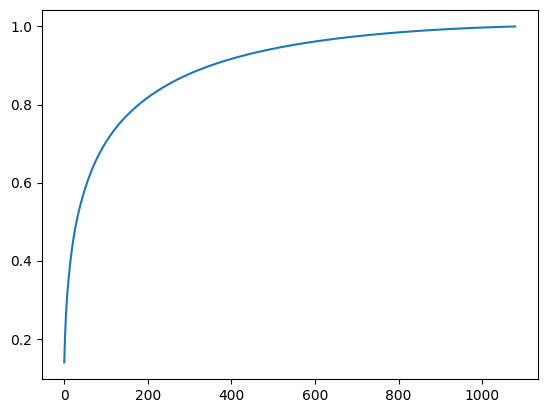

In [50]:
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))